In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
precip_data = session.query(Measurement).first()
precip_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x64f4bbffd0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [17]:
#Explore Measurements table
# inspector = inspect(engine)
# columns = inspector.get_columns('Measurement')
# for column in columns:
#     print(column["name"], column["type"])
measurements_table = session.query(Measurement.station,Measurement.date, Measurement.prcp, Measurement.tobs).all()
for i in measurements_table:
    print(i)

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the result

# Calculate the date 1 year ago from the last data point in the database
most_current = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#most_current #last date/most recent observation 2017-08-23
most_current = list(np.ravel(most_current))
most_current =  dt.datetime.strptime(most_current[0], "%Y-%m-%d")
yr_frm_moscurr = most_current.replace(year= most_current.year - 1)
#most_current
#yr_frm_moscurr

# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= yr_frm_moscurr).order_by(Measurement.date).all()
year_precip

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

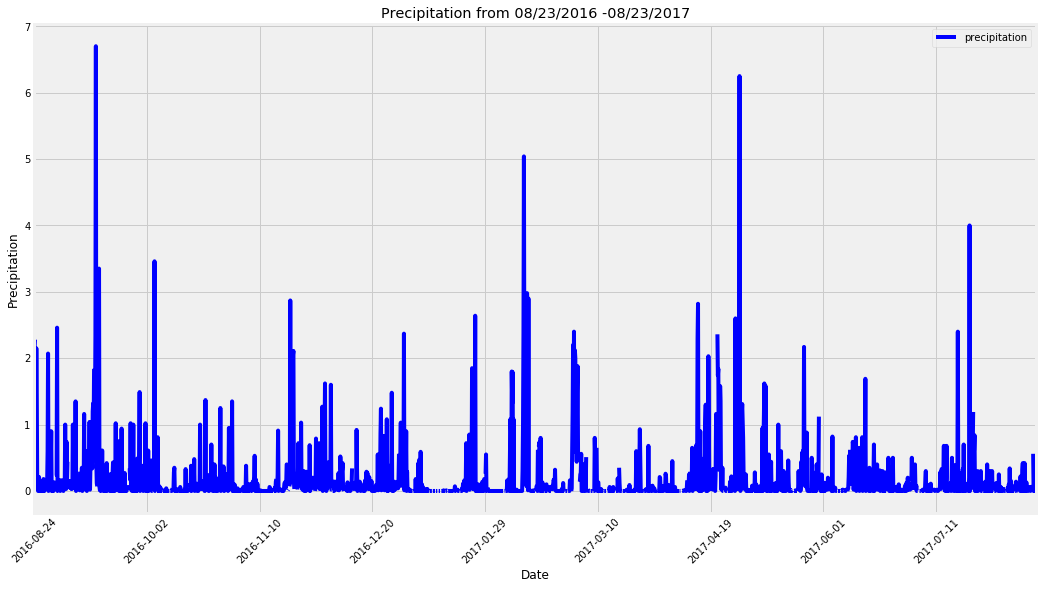

In [33]:

# Save the query results as a Pandas DataFrame and set the index to the date column
year_precip_df = pd.DataFrame(year_precip,columns=['date','precipitation'])
year_precip_df = year_precip_df.set_index('date',inplace=False)
year_precip_df
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
year_precip_df.plot(figsize = (16, 9), rot=45, use_index=True, legend=True, grid=True, color='b')
plt.title("Precipitation from 08/23/2016 -08/23/2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.id).count()
station_count

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?

#Pandas solution
measurement_data = session.query(Measurement.tobs,Measurement.station).all() 
measurement_data_df = pd.DataFrame(measurement_data)
station_activity = measurement_data_df.groupby('station').count().sort_values(['tobs'],ascending=False)
station_activity

#Sql solution.
measure_query = session.query(Measurement.station,func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
measure_query
# List the stations and the counts in descending order.
measurement_data

[(65.0, 'USC00519397'),
 (63.0, 'USC00519397'),
 (74.0, 'USC00519397'),
 (76.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (61.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (65.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (72.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (76.0, 'USC00519397'),
 (68.0, 'USC00519397'),
 (72.0, 'USC00519397'),
 (70.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (66.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (67.0, 'USC00519397'),
 (64.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (73.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (69.0, 'USC00519397'),
 (71.0, 'USC00519397'),
 (61.0, 'USC0051

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
highest_temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == measure_query[0][0]).all()
highest_temp

[(54.0, 85.0, 71.66378066378067)]

[(54.0, 85.0, 71.66378066378067)]

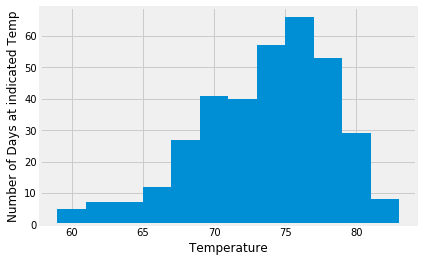

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_year_temps = session.query(Measurement.tobs).\
filter(Measurement.station == measure_query[0][0], Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()
waihee_year_temps

waihee_tobs_df = pd.DataFrame(waihee_year_temps)
plt.hist(waihee_tobs_df["tobs"],bins=12)
plt.xlabel("Temperature")
plt.ylabel("Number of Days at indicated Temp")
plt.show()

![precipitation](Images/station-histogram.png)

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates. 
# The question asks for a query to return data from the PRIOR year, within the range of the start/end dates.
# I modified the original function so that the query runs for the correct dates. I converted/calculated the prior year dates
# without using any datetime functionality. I used a function that splits the date string, converts the year, 
# then rebuilds a date string for the query.

# The data end at 2017. Limitation of the function. year max value for start date is 2018.
def date_converter(date):
    split = ['-'] # character to split on
    def split_string(source, splitlist): # split string into a list containing [yr,mnth,day]
        output = [] # list to hold year,month,day once split
        atsplit = True
        for char in source:
            if char in splitlist:
                atsplit = True
            else:
                if atsplit:
                    output.append(char)
                    atsplit = False
                else:
                    output[-1] = output[-1] + char
        return output
    
    date_split = split_string(date,split) #split start date
    
    def convert(date_split): # takes a list[y,m,d], converts the year item to integer,subtracts 1, then rebuilds the date string
        int_year = int(date_split[0])
        date_split[0] = str(int_year - 1)
        prior_year_str = "{}{}{}{}{}".format(date_split[0],split[0],date_split[1],split[0],date_split[2]) 
        return prior_year_str
    prior_yr_date = convert(date_split)
    return prior_yr_date
    

def calc_temps(start_date, end_date):
    
    data_start = date_converter(start_date) # convert date,assign new var to use in query
    data_end = date_converter(end_date)     # convert date,assign new var to use in query
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= data_start).filter(Measurement.date <= data_end).all()

# Calculate data for my chosen start/end date.
# define var's for start/end dates if needed elsewhere
trip_start = '2018-06-12'
trip_end = '2018-06-22'
trip_temps = calc_temps(trip_start, trip_end)
trip_temps



[(72.0, 77.04225352112677, 83.0)]

62.0 68.36585365853658 74.0


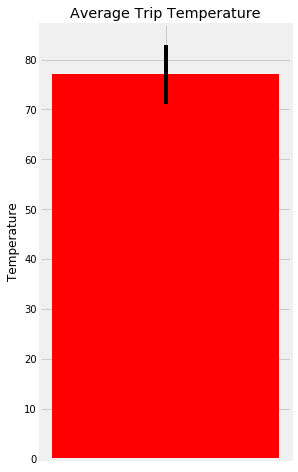

In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(4,8))
plt.bar(1,trip_temps[0][1], yerr=(trip_temps[0][2] - trip_temps[0][1]), tick_label='', color='r')
plt.ylabel("Temperature")
plt.title("Average Trip Temperature")
plt.show()

 # Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
query_strt_date = date_converter(trip_start)
query_end_date = date_converter(trip_end)

station_precip_ttl = session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,\
func.sum(Measurement.prcp)).\
filter(Measurement.station == Station.station, Measurement.date >= query_strt_date, Measurement.date <= query_end_date).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

station_precip_ttl

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  6.1499999999999995),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.9500000000000002),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.83),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.5399999999999998),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.24000000000000002),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.09000000000000001),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [21]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("08-01")

[(67.0, 75.54, 83.0)]

In [22]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
        #trip_start defined earlier/above as a string "2018-06-12"
        #trip_end   defined earlier/above as a string "2018-06-22"

# Use the start and end date to create a range of dates
# Convert trip_start/end to datetime object. 
start = dt.datetime.strptime(trip_start, "%Y-%m-%d")
end = dt.datetime.strptime(trip_end, "%Y-%m-%d")
whole_trip = []
counter = start
# Counter set to first day of trip. While counter is less or equal to end date. Build list of days between start & end.
while counter <= end:
    whole_trip.append(counter.strftime("%m-%d"))
    counter = counter.replace(day=counter.day +1)
#whole_trip

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
[normals.append(daily_normals(date)[0]) for date in whole_trip]
normals

[(66.0, 75.66666666666667, 83.0),
 (68.0, 75.66666666666667, 81.0),
 (69.0, 75.62711864406779, 81.0),
 (67.0, 75.40350877192982, 81.0),
 (69.0, 75.41379310344827, 81.0),
 (68.0, 74.59322033898304, 81.0),
 (69.0, 74.60344827586206, 80.0),
 (70.0, 75.44067796610169, 82.0),
 (68.0, 73.96491228070175, 85.0),
 (68.0, 74.75862068965517, 82.0),
 (69.0, 75.15789473684211, 81.0)]

In [49]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(normals, columns = ['tmin','tavg','tmax'])
normals_df['dates']= whole_trip
normals_df = normals_df.set_index('dates', inplace=False)
normals_df

,tmin,tavg,tmax
dates,,,
06-12,66.0,75.666667,83.0
06-13,68.0,75.666667,81.0
06-14,69.0,75.627119,81.0
06-15,67.0,75.403509,81.0
06-16,69.0,75.413793,81.0
06-17,68.0,74.593220,81.0
06-18,69.0,74.603448,80.0
06-19,70.0,75.440678,82.0
06-20,68.0,73.964912,85.0


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


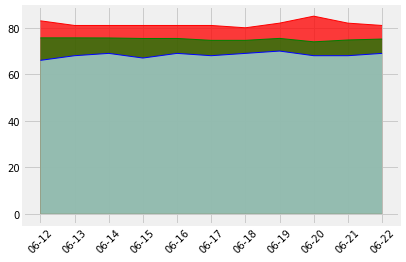

In [66]:
# Plot the daily normals as an area plot with `stacked=False`

#normals_df.plot(figsize = (4,9), rot=45,legend=True,use_index = True, grid=True, color=['lightblue','g','r'])
plt.plot(normals_df.index,normals_df.tmax, color = 'r', linewidth = '1', label = 'tmax')
plt.plot(normals_df.index,normals_df.tavg, color = 'g', linewidth = '1', label = 'tavg')
plt.plot(normals_df.index,normals_df.tmin, color = 'b', linewidth = '1', label = 'tmin')
plt.xticks(rotation = 45)

plt.fill_between(normals_df.index,normals_df.tmax, where=normals_df.tmax>=0, facecolor='red', alpha = '.76')
plt.fill_between(normals_df.index,normals_df.tavg, where=normals_df.tavg>=0, facecolor='green', alpha = '.7')
plt.fill_between(normals_df.index,normals_df.tmin, where=normals_df.tmin>=0, facecolor='lightblue',alpha = '.75')



plt.show()